# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Muhammad Faiz Al-dzikro]
- **Email:** [faizaldzikro14032005@gmail.com]
- **ID Dicoding:** [faizad14]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca terhadap jumlah penyewaan sepeda?
Ini membantu dalam memahami apakah kondisi cuaca tertentu mendorong atau mengurangi penyewaan sepeda.
- Kapan waktu (hari/jam) terbaik untuk penyewaan sepeda?
Memahami tren penyewaan pada hari atau jam tertentu bisa membantu pengelola mengoptimalkan operasi.

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



```
# Ini diformat sebagai kode
```

## Data Wrangling

### Gathering Data

In [ ]:
day_data = pd.read_csv('/content/day.csv')
hour_data = pd.read_csv('/content/hour.csv')

print("Day Data:")
print(day_data.head())

print("\nHour Data:")
print(hour_data.head())

Day Data:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Hour Data:
   i

### Assessing Data

In [ ]:
print("Info Day Data:")
print(day_data.info())

print("\nInfo Hour Data:")
print(hour_data.info())


Info Day Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Info Hour Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 

**Insight:**
- Kolom penting yang mungkin mempengaruhi analisis:
temp: Suhu yang mungkin mempengaruhi penyewaan sepeda.
hum: Kelembaban.
windspeed: Kecepatan angin.
cnt: Jumlah penyewaan.

### Cleaning Data

In [ ]:
# Mengecek missing values
print(day_data.isnull().sum())
print(hour_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
-Jika tidak ada missing values, kita bisa lanjut. Jika ada, kita bisa menghapus atau mengisi data yang hilang.

## Exploratory Data Analysis (EDA)

### Explore ...

**1. Pengaruh Cuaca terhadap Penyewaan Sepeda:**

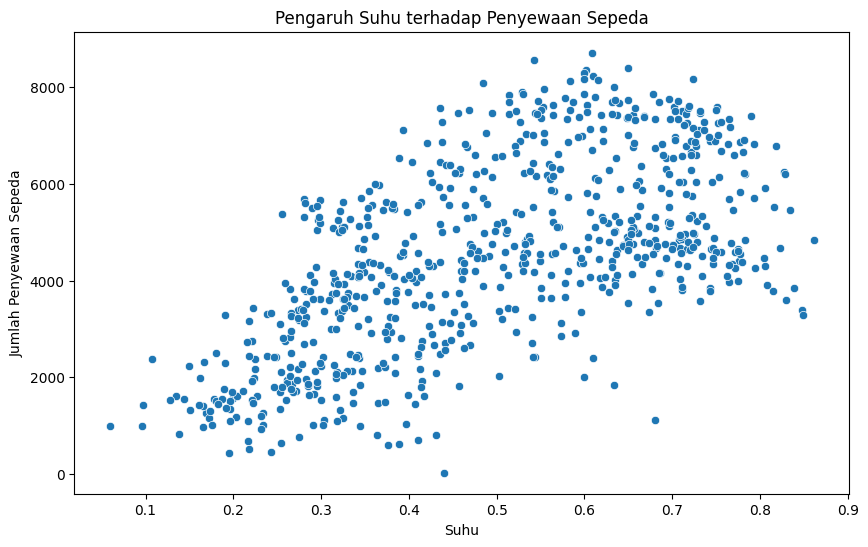

In [ ]:
# Visualisasi pengaruh suhu terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Pengaruh Suhu terhadap Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight:**
- Jika ada korelasi positif antara suhu dan jumlah penyewaan, maka cuaca yang hangat mendorong lebih banyak orang untuk menyewa sepeda.

**2. Penyewaan Berdasarkan Hari dalam Seminggu:**

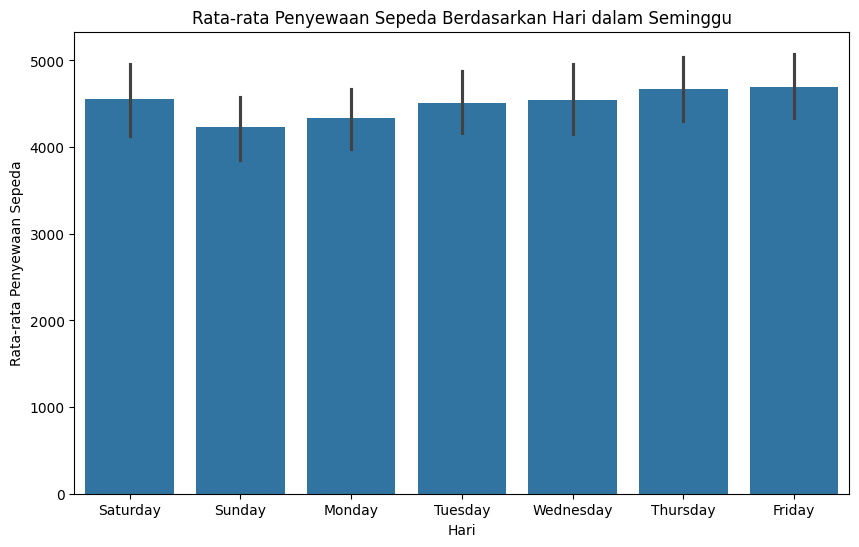

In [ ]:
# Menambah kolom 'day_of_week' dari kolom 'dteday'
day_data['day_of_week'] = pd.to_datetime(day_data['dteday']).dt.day_name()

# Visualisasi penyewaan berdasarkan hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='cnt', data=day_data, estimator=np.mean)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()


**Insight:**
- Jika ada korelasi positif antara suhu dan jumlah penyewaan, maka cuaca yang hangat mendorong lebih banyak orang untuk menyewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda?

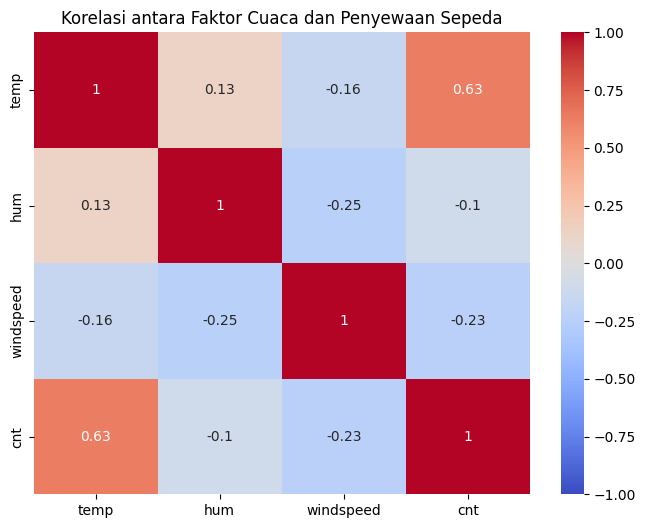

In [ ]:
# Melihat korelasi antara faktor cuaca dan jumlah penyewaan sepeda
correlation = day_data[['temp', 'hum', 'windspeed', 'cnt']].corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi antara Faktor Cuaca dan Penyewaan Sepeda')
plt.show()


### Pertanyaan 2:Kapan Waktu Terbaik untuk Penyewaan Sepeda?

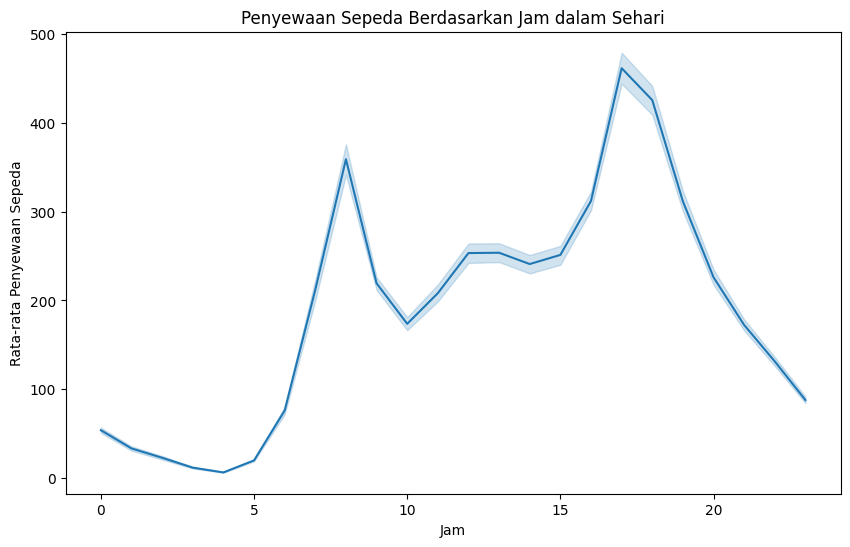

In [ ]:
# Visualisasi penyewaan sepeda berdasarkan jam
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hour_data, estimator=np.mean)
plt.title('Penyewaan Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

**Insight:**
- Akan terlihat pada jam mana dalam sehari penyewaan sepeda mencapai puncaknya.

# Conclusion

- Conclution pertanyaan 1 : Ada korelasi antara suhu dan jumlah penyewaan sepeda, di mana penyewaan meningkat saat suhu lebih hangat. Namun, kecepatan angin dan kelembaban menunjukkan pengaruh negatif yang ringan.
- Conclution pertanyaan 2 : Penyewaan sepeda cenderung meningkat di pagi hari dan sore hari, terutama saat jam berangkat dan pulang kerja.